<a href="https://colab.research.google.com/github/jellydaniellie/cs6501-project/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

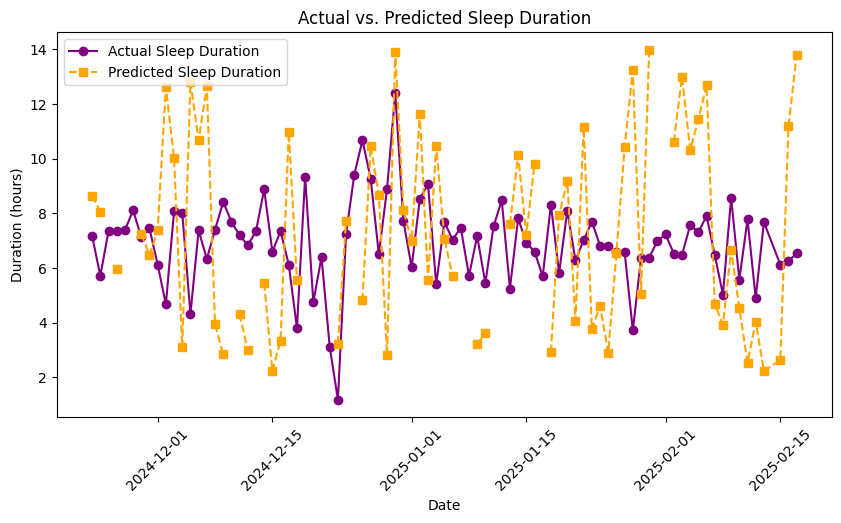

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sleep_predictions (3).csv')
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Sleep Duration (hours)'], marker='o', label="Actual Sleep Duration",color='purple')
plt.plot(df['Date'], df['Predicted Sleep Duration (hrs)'], marker='s', linestyle="dashed", label="Predicted Sleep Duration", color='orange')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Duration (hours)")
plt.title("Actual vs. Predicted Sleep Duration")
plt.legend()
plt.show()

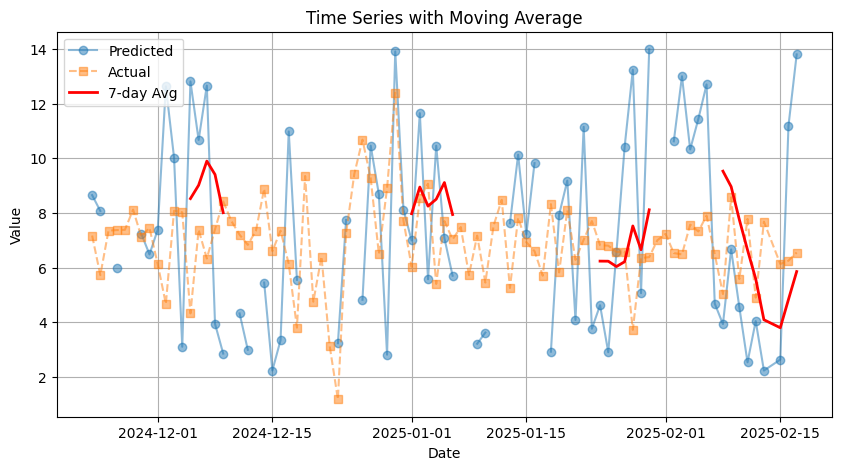

In [ ]:
df['Rolling_Avg'] = df['Predicted Sleep Duration (hrs)'].rolling(window=7).mean()  # 7-day moving average

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Predicted Sleep Duration (hrs)'], marker='o', alpha=0.5, label="Predicted")
plt.plot(df['Date'], df['Sleep Duration (hours)'], marker='s', linestyle="dashed", alpha=0.5, label="Actual")

plt.plot(df['Date'], df['Rolling_Avg'], color='red', linewidth=2, label="7-day Avg")

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series with Moving Average")
plt.legend()
plt.grid(True)
plt.show()


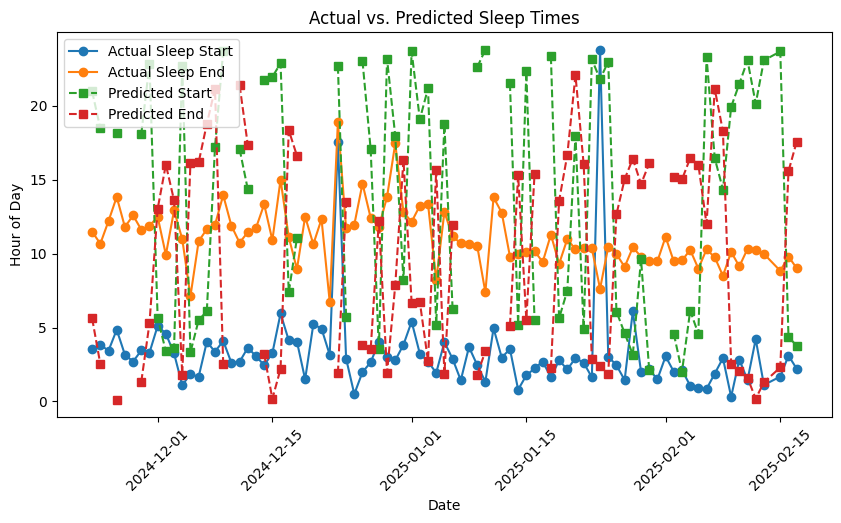

In [ ]:
# Convert to datetime
df['Sleep Start'] = pd.to_datetime(df['Sleep Start'])
df['Sleep End'] = pd.to_datetime(df['Sleep End'])
df['Predicted Sleep Start'] = pd.to_datetime(df['Predicted Sleep Start'], errors='coerce')
df['Predicted Sleep End'] = pd.to_datetime(df['Predicted Sleep End'], errors='coerce')

# Extract hours
df['Sleep Start Hour'] = df['Sleep Start'].dt.hour + df['Sleep Start'].dt.minute / 60
df['Sleep End Hour'] = df['Sleep End'].dt.hour + df['Sleep End'].dt.minute / 60
df['Predicted Start Hour'] = df['Predicted Sleep Start'].dt.hour + df['Predicted Sleep Start'].dt.minute / 60
df['Predicted End Hour'] = df['Predicted Sleep End'].dt.hour + df['Predicted Sleep End'].dt.minute / 60

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Sleep Start Hour'], marker='o', label="Actual Sleep Start")
plt.plot(df['Date'], df['Sleep End Hour'], marker='o', label="Actual Sleep End")
plt.plot(df['Date'], df['Predicted Start Hour'], marker='s', linestyle="dashed", label="Predicted Start")
plt.plot(df['Date'], df['Predicted End Hour'], marker='s', linestyle="dashed", label="Predicted End")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Hour of Day")
plt.title("Actual vs. Predicted Sleep Times")
plt.legend()
plt.show()


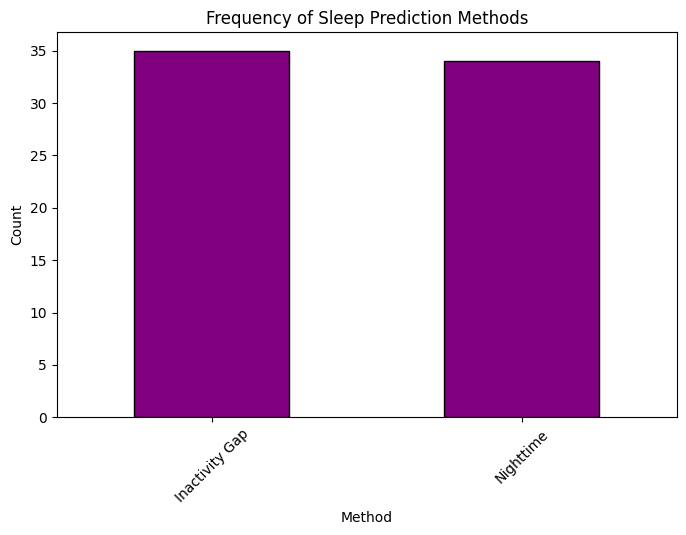

,count
Method,
Inactivity Gap,35
Nighttime,34


In [ ]:
# Count occurrences of each method
method_counts = df['Method'].value_counts()

# Plot method distribution
plt.figure(figsize=(8, 5))
method_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel("Method")
plt.ylabel("Count")
plt.title("Frequency of Sleep Prediction Methods")
plt.xticks(rotation=45)
plt.show()

# Display the most common method
method_counts


                count      mean       std   min     25%   50%    75%   max
Method                                                                    
Inactivity Gap   35.0  2.559143  3.555955 -3.84  0.1950  2.31  4.895  9.52
Nighttime        34.0 -1.757059  3.004463 -6.09 -3.9975 -1.87  0.790  4.80


<Figure size 800x500 with 0 Axes>

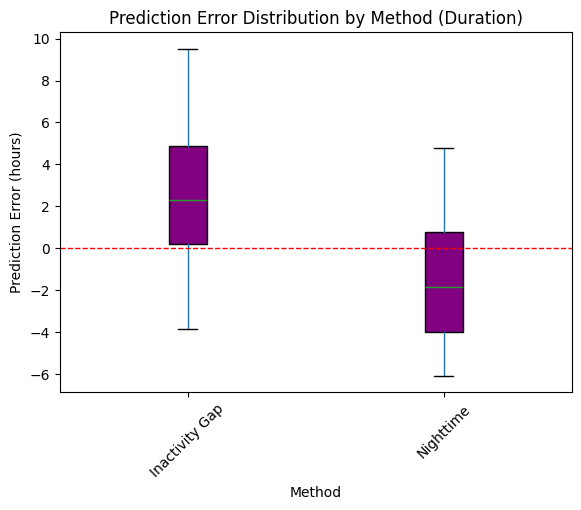

In [ ]:

# Compute the prediction error for each method
df['Error (hours)'] = df['Predicted Sleep Duration (hrs)'] - df['Sleep Duration (hours)']

# Group by method and calculate statistics on error
method_error_stats = df.groupby('Method')['Error (hours)'].describe()
print(method_error_stats)

# Boxplot to visualize error distribution per method
# positive median = overestimated duration
# negative median = underestimated duration
# nighttime showed less variability than inactivity gap, but consistently underestimated
plt.figure(figsize=(8, 5))
df.boxplot(column='Error (hours)', by='Method',grid=False, patch_artist=True, boxprops=dict(facecolor='purple', color='black'))

plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Reference line for perfect prediction
plt.xticks(rotation=45)
plt.xlabel("Method")
plt.ylabel("Prediction Error (hours)")
plt.title("Prediction Error Distribution by Method (Duration)")
plt.suptitle("")  # Remove default title
plt.show()


In [ ]:
import scipy.stats as stats

data = df['Sleep Duration (hours)']
distributions = ['norm', 'expon', 'gamma', 'beta', 'lognorm']
best_fit = {}
for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    best_fit[dist_name] = params

best_fit  # Displays the parameters for each distribution


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


{'norm': (6.936627906976742, 1.5730732847585966),
 'expon': (1.18, 5.7566279069767425),
 'gamma': (413.58189469355943, -25.544638725590012, 0.07851051673671108),
 'beta': (8154.769278692636,
  514.6027775971766,
  -575.6481923653292,
  619.3491181581386),
 'lognorm': (1.1490993593340615e-05, -136889.44304195477, 136896.37966082364)}

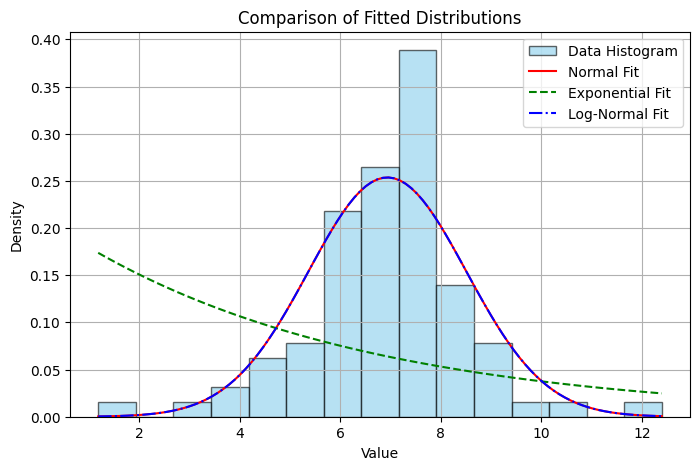

In [ ]:

plt.figure(figsize=(8, 5))

# Histogram of data
plt.hist(data, bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Data Histogram")

# Fit and plot different distributions
x = np.linspace(min(data), max(data), 100)

# Normal Distribution
mu, std = stats.norm.fit(data)
pdf_norm = stats.norm.pdf(x, mu, std)
plt.plot(x, pdf_norm, 'r-', label=f'Normal Fit')

# Exponential Distribution
lambda_exp = stats.expon.fit(data)
pdf_expon = stats.expon.pdf(x, *lambda_exp)
plt.plot(x, pdf_expon, 'g--', label=f'Exponential Fit')

# Log-Normal Distribution
shape, loc, scale = stats.lognorm.fit(data)
pdf_lognorm = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognorm, 'b-.', label=f'Log-Normal Fit')

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Comparison of Fitted Distributions")
plt.legend()
plt.grid(True)
plt.show()
